In [24]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(
    hidden_layer_sizes=64,
    activation="logistic",
    solver="sgd",
    alpha=0,
    batch_size=1,
    learning_rate_init=0.01,
    shuffle=True,
    momentum=0,
    n_iter_no_change=50,
    max_iter=1000,
)
mlp = mlp.fit(X_train, y_train)

Mean squared error: 0.95
Mean absolute error: 0.77
Coefficient of determination: -0.02


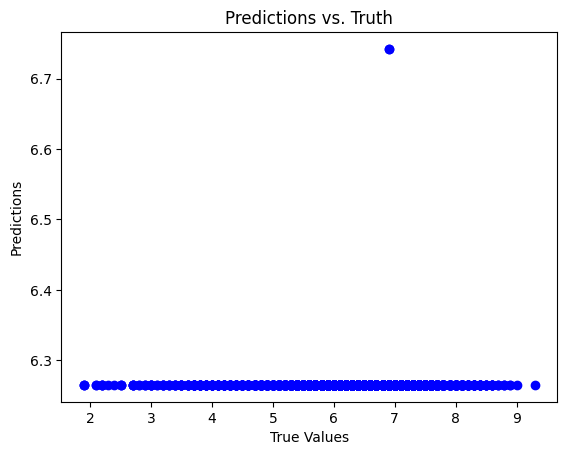

Mean squared error: 0.93
Mean absolute error: 0.77
Coefficient of determination: -0.02


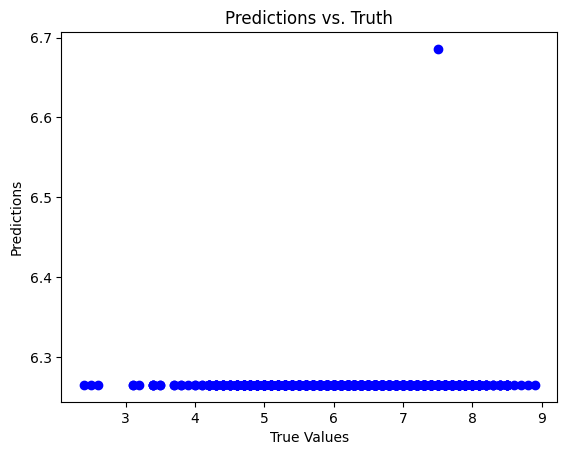

In [25]:
evaluate(mlp, X_train, y_train)
evaluate(mlp, X_test, y_test)

In [26]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=15)
knn = knn.fit(X_train, y_train)

Mean squared error: 0.69
Mean absolute error: 0.64
Coefficient of determination: 0.26


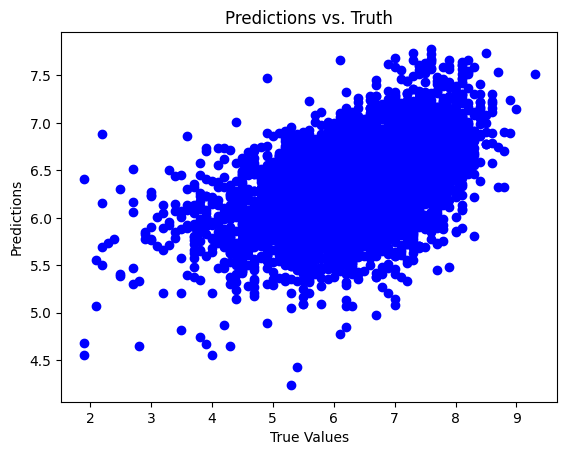

Mean squared error: 0.76
Mean absolute error: 0.68
Coefficient of determination: 0.16


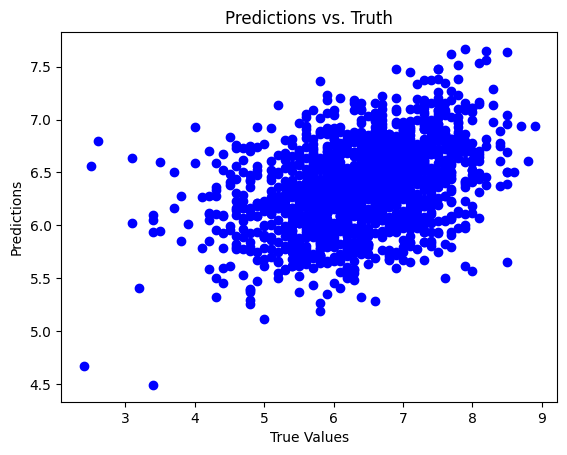

In [27]:
evaluate(knn, X_train, y_train)
evaluate(knn, X_test, y_test)

In [28]:
evaluate(ereg, X_train, y_train)
evaluate(ereg, X_test, y_test)

NameError: name 'ereg' is not defined

In [ ]:
# Ensemble
from sklearn.ensemble import StackingRegressor

reg1 = knn
reg2 = forest
reg3 = gradient_boosting
reg4 = linear_regressor
reg5 = decision_tree
reg6 = mlp

stack = StackingRegressor(
    estimators=[("knn", reg1), ("rf", reg2), ("gb", reg3), ("lr", reg4)],
    final_estimator=MLPRegressor(
        hidden_layer_sizes=64,
        activation="logistic",
        solver="sgd",
        alpha=0,
        batch_size=1,
        learning_rate_init=0.01,
        shuffle=True,
        momentum=0,
        n_iter_no_change=50,
        max_iter=1000,
    ),
)
stack = stack.fit(X_train, y_train)

Mean squared error: 0.45
Coefficient of determination: 0.52


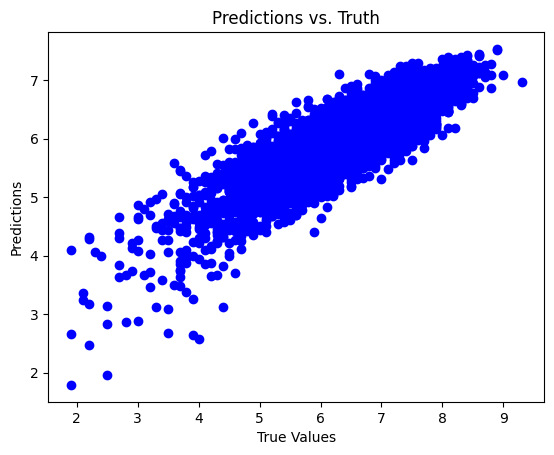

Mean squared error: 0.69
Coefficient of determination: 0.25


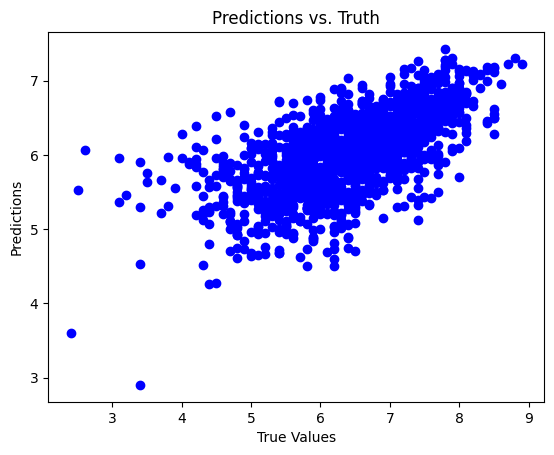

In [ ]:
evaluate(stack, X_train, y_train)
evaluate(stack, X_test, y_test)